In [ ]:
# from google.colab import files
# files.upload() #upload kaggle.json
! pip install -q kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions -h
!kaggle competitions download -c DATASET
!pip install librosa
from IPython.display import clear_output
clear_output(wait=True)
print("All Good")

All Good


In [ ]:
!kaggle datasets download -d ogechukwu/voice

 99% 796M/802M [00:18<00:00, 40.9MB/s]
100% 802M/802M [00:18<00:00, 45.9MB/s]


In [ ]:
!ls

kaggle.json  man.wav  sample_data  voice.zip  women.wav


In [ ]:
!mkdir Voice
!unzip voice.zip -d Voice
clear_output(wait=True)
print("file unziped seccessfully")

file ziped seccessfully


In [ ]:
# Voice/multiple_sentences/multiple_sentences
!ls Voice

BVC_Voice_Bio_Public.xlsx  multiple_sentences  S_02_voice
BVCvoicereadme.txt	   one_sentence


In [ ]:
# imports 
import numpy as np
import os
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def extract_feature(file_name, mel=False):
  X, sample_rate = librosa.core.load(file_name)
  result = np.array([])
  if mel:
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    result = np.hstack((result, mel))
  return result

In [ ]:
m_files = os.listdir("Voice/multiple_sentences/multiple_sentences")
print(len(m_files))

1778


In [ ]:
mydata = []
for i in range(len(m_files)):
  clear_output(wait=True)
  print(round(i+1*100/len(m_files),2),"%")
  mydata.append((extract_feature('Voice/multiple_sentences/multiple_sentences/'+m_files[i], mel=True),m_files[i][5:9]))

print(len(mydata))
print("File example ==>",my)

99.94 %
1778


In [ ]:
df = pd.read_excel("Voice/BVC_Voice_Bio_Public.xlsx")
df.head()

,New_ID,Sex,Age,Ethnicity,Unnamed: 4,Unnamed: 5
0,4001,'Male',19,'Igbo',NaN,336
1,4002,'Male',23,'Igbo',NaN,190
2,4003,'Female',18,'Ikwerre',NaN,NaN
3,4004,'Male',23,'Annang',NaN,% Actual subjects = 526
4,4005,'Female',17,'Igbo',NaN,% Male subjects = 336


In [ ]:
new_data = []
for i in range(len(mydata)):
  for j in range(len(df["New_ID"])):
    if str(df["New_ID"][j]) == mydata[i][-1]:
      new_data.append(list(mydata[i][:-1])+[df["Sex"][j]])
print(len(new_data))


1778


In [ ]:
my_backup = new_data

In [ ]:
backup = new_data
new_data = np.array([np.append(data[0],data[1]) for data in new_data])
new_data.shape

(1778, 129)

In [ ]:
df1 = pd.DataFrame(new_data)
female=df1[df1.columns[-1]]=="'Female'"
male=df1[df1.columns[-1]]=="'Male'"
df1.loc[female,df1.columns[-1]]=0
df1.loc[male,df1.columns[-1]]=1
df1[df1.columns[-1]].head()

0    1
1    0
2    1
3    0
4    1
Name: 128, dtype: object

In [ ]:
df1.rename(columns={df1.columns[-1]: 'Label'},inplace=True, errors='raise')

In [ ]:
df1["Label"].value_counts()

0    1068
1     710
Name: Label, dtype: int64

In [ ]:
df1.to_excel("gendervoicenewfeatuers.xlsx")

In [ ]:
def NormalizeData(Data,Max,Min):
  return (Data - Min )/ (Max - Min)

In [ ]:
VoiceDataSet = pd.read_excel("gendervoicenewfeatuers.xlsx")
VoiceDataSet.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,Label
0,0,0.925027,2.000303,2.284644,3.601917,5.055659,0.982506,0.196366,1.472436,1.823871,3.657765,1.557071,0.295402,0.652305,0.853404,2.566782,1.967675,0.163875,0.158394,0.236541,0.898544,0.817417,0.297798,0.240663,0.217572,0.161539,0.151001,0.103276,0.027524,0.017093,0.030505,0.050590,0.031695,0.015123,0.012572,0.019056,0.034626,0.014938,0.008243,0.010653,...,0.000893,0.000525,0.000767,0.000592,0.000568,0.000886,0.000665,0.001164,0.001510,0.002954,0.003314,0.004001,0.007458,0.007276,0.003083,0.004109,0.001951,0.001173,0.000639,0.000225,0.000131,0.000190,0.000278,0.000554,0.001096,0.001911,0.002061,0.001619,0.002397,0.005204,0.006785,0.014183,0.012230,0.006204,0.005102,0.006002,0.005591,0.001690,0.000062,1
1,1,2.513860,1.236263,0.906270,1.055306,1.231358,0.926998,4.667488,19.936989,38.606274,58.163490,16.787035,1.234821,0.378178,0.648627,3.979116,16.084593,55.738556,121.088860,94.975304,66.580734,14.693995,1.712092,1.968415,2.352561,5.579044,2.113268,2.476295,3.877565,1.957971,1.441020,0.561453,0.116837,0.251425,0.143185,0.102755,0.216739,0.335129,0.309747,0.176618,...,0.055590,0.063638,0.058172,0.042185,0.019295,0.016689,0.011899,0.016966,0.024845,0.021829,0.021918,0.015705,0.010354,0.004418,0.002417,0.002838,0.001960,0.001188,0.000818,0.000735,0.000599,0.000591,0.000480,0.000397,0.000389,0.000514,0.000625,0.000755,0.000742,0.000764,0.000697,0.000660,0.000600,0.000562,0.000519,0.000632,0.000662,0.000234,0.000019,0
2,2,1.390107,0.516911,0.240556,0.921591,0.982184,0.282965,0.060686,0.645197,2.028746,1.309102,0.799023,0.334232,0.955266,0.736674,0.058816,0.035430,0.093364,0.174066,0.115834,0.118308,0.071835,0.038149,0.041938,0.056136,0.077304,0.023162,0.014691,0.040603,0.057762,0.035311,0.014908,0.013486,0.009263,0.008255,0.016634,0.021320,0.014183,0.008518,0.007544,...,0.000505,0.000457,0.000485,0.000477,0.000339,0.000182,0.000188,0.000083,0.000060,0.000049,0.000054,0.000051,0.000086,0.000153,0.000201,0.000095,0.000036,0.000011,0.000004,0.000003,0.000005,0.000011,0.000047,0.000096,0.000195,0.000170,0.000182,0.000149,0.000102,0.000076,0.000048,0.000042,0.000054,0.000062,0.000072,0.000060,0.000044,0.000015,0.000001,1
3,3,0.596188,0.738228,0.400710,0.307558,0.111309,0.097013,0.708290,2.582285,3.837077,5.949494,1.232299,0.175778,0.096890,0.080902,0.671900,1.504775,0.630632,2.586004,5.855242,3.829371,1.233824,0.392108,1.785146,1.833220,0.676482,0.213012,0.480332,1.694276,2.951475,3.469761,1.441479,0.338079,0.049186,0.017173,0.012440,0.043101,0.201223,0.332596,0.197210,...,0.003936,0.002988,0.002588,0.003834,0.004793,0.006052,0.001842,0.001246,0.001864,0.002057,0.002000,0.001367,0.001877,0.002061,0.002883,0.003748,0.004431,0.001724,0.000843,0.000779,0.000882,0.001060,0.001587,0.001562,0.001514,0.001845,0.001909,0.002353,0.002227,0.001773,0.001194,0.001168,0.000775,0.000723,0.000570,0.000440,0.000366,0.000139,0.000017,0
4,4,0.657857,0.726378,0.334049,0.935429,0.624316,0.836977,1.966293,0.756116,0.168270,0.072925,0.086691,0.428330,2.697008,5.333248,1.136979,0.249059,0.210223,0.127543,0.255428,1.529648,2.657741,0.250673,0.192079,0.787448,1.134799,0.713419,0.573058,0.570921,0.190335,0.128919,0.157925,0.391548,0.691296,0.329613,0.332312,0.228902,0.162673,0.235988,0.263998,...,0.000190,0.000198,0.000227,0.000346,0.000417,0.000598,0.000734,0.000993,0.000938,0.001153,0.001267,0.001026,0.000731,0.000623,0.000426,0.000323,0.000199,0.000126,0.000093,0.000064,0.000047,0.000033,0.000025,0.000029,0.000033,0.000039,0.000062,0.000093,0.000098,0.000077,0.000076,0.000074,0.000059,0.000055,0.000045,0.000033,0.000024,0.000011,0.000001,1


In [ ]:
#remove unused columns
VoiceDataSet = VoiceDataSet.drop(['Unnamed: 0'], axis=1)

#nbr of clumns
print(VoiceDataSet.columns)

# Values shape
print(VoiceDataSet.shape)

# counting values male and female
print(VoiceDataSet["Label"].value_counts())

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           119,     120,     121,     122,     123,     124,     125,     126,
           127, 'Label'],
      dtype='object', length=129)
(1778, 129)
0    1068
1     710
Name: Label, dtype: int64


In [ ]:
# cut data  nbr of female == nbr of male
VoiceDataSet=VoiceDataSet.sort_values(by=['Label'])
VoiceDataSet = VoiceDataSet[358:]
VoiceDataSet["Label"].value_counts()

0    710
1    710
Name: Label, dtype: int64

In [ ]:
#extract attributes
X_ = VoiceDataSet.drop(['Label'], axis=1)
X_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
1636,0.043800,0.003534,0.001663,0.002542,0.002094,0.026537,0.725898,1.538919,1.867037,0.345135,0.006826,0.012512,0.031805,0.130068,0.485692,0.574280,0.865139,0.612310,0.107918,0.003664,0.003824,0.006032,0.016595,0.008814,0.011561,0.022951,0.034783,0.033849,0.013105,0.009625,0.005082,0.002029,0.006585,0.019624,0.041648,0.044322,0.030823,0.020590,0.010544,0.011822,...,0.000174,0.000152,0.000215,0.000203,0.000227,0.000182,0.000122,0.000116,0.000108,0.000035,0.000030,0.000047,0.000060,0.000054,0.000046,0.000042,0.000036,0.000031,0.000025,0.000018,0.000014,0.000012,0.000010,0.000009,0.000008,0.000007,0.000010,0.000025,0.000049,0.000049,0.000044,0.000038,0.000034,0.000026,0.000024,0.000022,0.000021,0.000018,0.000008,9.099595e-07
1633,4.740623,3.169841,2.405522,0.938001,0.467829,1.256625,5.439962,3.167345,5.137428,7.623858,1.086185,0.320068,0.566549,0.981059,1.772988,0.276098,0.133096,1.600190,3.424513,1.693606,0.795824,2.180952,0.993798,0.270555,0.145529,0.084381,0.080003,0.153510,0.315480,0.985760,0.312332,0.049485,0.035897,0.041599,0.057596,0.079626,0.123186,0.061976,0.203506,0.684347,...,0.002796,0.004780,0.002383,0.007157,0.001745,0.001229,0.000774,0.000848,0.001106,0.002088,0.003086,0.004649,0.005297,0.009999,0.009403,0.003867,0.003385,0.002238,0.002276,0.001036,0.000603,0.000369,0.000427,0.000435,0.000427,0.000608,0.000815,0.000751,0.000955,0.000926,0.000775,0.000689,0.000552,0.000605,0.000953,0.001688,0.002892,0.002647,0.000766,5.478665e-05
1632,4.104086,3.021070,2.180869,1.533656,2.294812,10.827289,18.179255,10.758744,10.060915,11.435773,2.067063,3.581467,5.831829,4.740278,3.687721,4.040212,4.934258,5.305862,6.433185,6.115793,4.856271,4.639276,3.759896,4.716572,1.809576,1.126268,1.732790,1.893987,2.370264,1.782849,0.484354,0.374068,0.353426,0.229578,0.200394,0.222759,0.354101,0.513545,0.389467,0.292529,...,0.013248,0.027667,0.030134,0.034671,0.031497,0.028824,0.019728,0.011683,0.007644,0.005080,0.012119,0.019770,0.028521,0.025760,0.024588,0.020000,0.019849,0.007904,0.005039,0.005438,0.005503,0.005806,0.007500,0.007374,0.006592,0.007186,0.006022,0.005375,0.006469,0.006042,0.005758,0.005402,0.006773,0.008711,0.010400,0.009706,0.008201,0.004795,0.001303,8.445464e-05
1628,0.307026,0.395965,0.321034,0.175815,0.251970,0.300953,0.234110,0.945805,4.421642,11.366581,6.396190,7.026959,4.878314,5.098422,3.771560,0.562587,0.696123,1.054128,0.713556,1.180810,1.812514,1.322898,4.563618,9.580385,10.928639,8.880775,6.614758,6.071688,3.151135,1.186546,0.917036,0.550765,0.102678,0.298938,0.358753,0.825815,0.773122,0.915707,0.479513,0.373639,...,0.010610,0.004276,0.003999,0.003845,0.003157,0.002871,0.003566,0.005236,0.004786,0.003315,0.002403,0.002339,0.001811,0.000752,0.000263,0.000145,0.000049,0.000025,0.000029,0.000032,0.000033,0.000054,0.000091,0.000090,0.000076,0.000074,0.000141,0.000209,0.000230,0.000239,0.000307,0.000304,0.000378,0.000480,0.000201,0.000162,0.000158,0.000152,0.000078,9.734807e-06
1627,1.167119,0.874686,0.689736,0.273903,0.190432,0.295174,1.173542,2.515785,3.748591,1.091434,0.053108,0.015389,0.104616,0.194869,0.214728,0.409472,0.811467,0.950435,0.559337,0.101884,0.013909,0.018921,0.048570,0.036990,0.021941,0.048196,0.075696,0.085376,0.051422,0.007009,0.005135,0.004578,0.002065,0.003152,0.008354,0.016635,0.049678,0.103187,0.037981,0.006569,...,0.000520,0.000654,0.000475,0.000691,0.000792,0.001119,0.001526,0.000826,0.000856,0.001143,0.000691,0.000458,0.000382,0.000807,0.001166,0.001576,0.001043,0.000463,0.000311,0.000522,0.000798,0.001239,0.001630,0.003340,0.004078,0.002409,0.001348,0.000596,0.000593,0.000478,0.000263,0.000278,0.000288,0.000336,0.000208,0.000222,0.000224,0.000170,0.000061,3.740965e-06


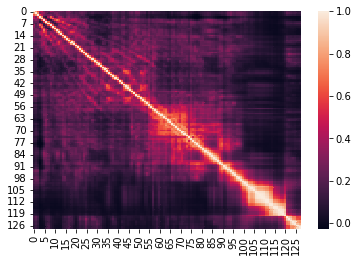

In [ ]:
# show the Relations between attributes
correlation = X_.corr()
sns.heatmap(correlation)
plt.show()

In [ ]:
#extract Labels
Y_ = VoiceDataSet['Label']

# splet data
X_train , X_test , y_train , y_test = train_test_split(X_,Y_, test_size=0.3)

#random forest model
Model = RandomForestClassifier(random_state=1)
Model.fit(X_train,y_train)
# scores
print(Model.score(X_test,y_test))

0.9530516431924883


In [ ]:
import pickle
#save model using pickle
filename = 'finalized_model.sav'
pickle.dump(Model, open(filename, 'wb'))

In [ ]:
# load the model from disk
filename = 'finalized_model.sav'
Model = pickle.load(open(filename, 'rb'))

In [ ]:
# prosses data
audioFilename = "man.wav"
prp = extract_feature(audioFilename, mel=True)
# make a data frame from array
Xpred = pd.DataFrame([prp])
Xpred.head()

(128,)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.803094,29.649767,82.172211,30.482418,7.513353,53.290798,114.420296,29.190651,50.346375,96.692322,58.944412,69.299973,37.074417,62.876282,58.645973,34.629074,14.380274,11.34363,3.469702,3.804049,2.29666,1.742182,1.697948,2.044546,1.3224,0.874328,0.59615,0.548302,0.748331,1.566148,0.961122,0.456644,0.746059,1.413306,2.632261,1.123479,0.294424,0.31604,0.177937,0.227419,...,0.00141,0.002472,0.003265,0.004277,0.003286,0.003928,0.004356,0.009818,0.025202,0.028917,0.027757,0.027826,0.024454,0.015795,0.013056,0.011717,0.008165,0.007945,0.014061,0.026124,0.020923,0.021355,0.013056,0.008021,0.003719,0.003676,0.002626,0.000903,0.000792,0.001001,0.001097,0.00092,0.000517,0.000498,0.000394,0.000493,0.000319,0.000188,0.000105,0.000013


In [ ]:
import IPython
# vrfy audio 
IPython.display.Audio(audioFilename)

In [1]:
# predict data
gender = ["Female","Male"]
gender[Model.predict(Xpred)[0]]

NameError: ignored